# Importing the libraries

In [1]:
import pandas as pd
import numpy as np

In [2]:
import pandas as pd
import numpy as np

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

from sklearn.svm import LinearSVC

In [3]:
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics                                                 
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

In [4]:
from sklearn import preprocessing

# importing the data set

In [5]:
df = pd.read_csv(r"C:\Users\akshay m patil\Downloads\fake_news.csv")

In [6]:
df


,author,fact,source,date,target
0,MadelineHeim,“It’s been over 50 years since minimum (wage) ...,Mandela Barnes,June2021,True
1,LauraSchulte,“We have a record 9.3 million job openings in ...,Glenn Grothman,June2021,True
2,D.L.Davis,"“Before the pandemic, just over 40,000 were on...",Mark Born,June2021,True
3,JohnPullano,It’s not currently “legal for a New York state...,Lorraine Lewandrowski,June2021,True
4,MadelineHeim,"“Since 1978, CEO compensation rose over 1,000%...",Mandela Barnes,June2021,True
...,...,...,...,...,...
18205,TomKertscher,Video shows the Jan. 6 Capitol riot was a “com...,Bloggers,June2021,False
18206,CiaraO'Rourke,Says a photo shows Michelle Obama as a man pri...,Instagram posts,June2021,False
18207,GabrielleSettles,"People with the COVID-19 vaccine are being ""tr...",Hal Turner Radio Show,May2021,False
18208,AndyNguyen,"Says BLM activist Sasha Johnson tweeted, “The ...",Facebook posts,May2021,False


# Describing the data

In [7]:
df.describe()

,author,fact,source,date,target
count,18210,18210,18210,18210,18210
unique,31,60,36,6,2
top,CiaraO'Rourke,Foxconn “is the largest taxpayer in Racine Cou...,Facebook posts,June2021,True
freq,1500,307,3014,5735,9210


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18210 entries, 0 to 18209
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   author  18210 non-null  object
 1   fact    18210 non-null  object
 2   source  18210 non-null  object
 3   date    18210 non-null  object
 4   target  18210 non-null  bool  
dtypes: bool(1), object(4)
memory usage: 587.0+ KB


In [9]:
df.isna().sum()

author    0
fact      0
source    0
date      0
target    0
dtype: int64

In [10]:
df.groupby('author').size().reset_index()\
.rename(columns= {0 : "Count"}).sort_values(by = "Count", 
                                            ascending = False).head(10)


,author,Count
6,CiaraO'Rourke,1500
0,AmySherman,1375
3,BrandonMulder,1360
21,MadelineHeim,1228
16,KelseyTamakloe,1200
10,HaleyBeMiller,921
30,WarrenFiske,914
28,TomKertscher,900
19,LouisJacobson,614
14,JonGreenberg,607


In [11]:
df.groupby('source').size().reset_index()\
.rename(columns= {0 : "Count"}).sort_values(by = "Count", 
                                            ascending = False).head(10)

,source,Count
8,Facebook posts,3014
12,Instagram posts,1800
33,Viral image,1200
6,Donald Trump,1200
19,Mandela Barnes,614
10,Greg Abbott,614
25,Terry McAuliffe,607
2,Bloggers,600
0,Barbara Dittrich,307
22,Pete Buttigieg,307


In [12]:
df['fact'][0]

'“It’s been over 50 years since minimum (wage) and inflation parted ways, then over a decade since the federal minimum went up at all.”'

### have copied df to df1(checkpoint)

In [13]:
df1 = df.copy()

#### converting author and source to numerical value and target 

In [14]:

le = preprocessing.LabelEncoder()
df1['author'] =le.fit_transform(df1['author'])

df1 =  pd.get_dummies(df1,columns =['target'],drop_first=True)
df1

,author,fact,source,date,target_True
0,21,“It’s been over 50 years since minimum (wage) ...,Mandela Barnes,June2021,1
1,18,“We have a record 9.3 million job openings in ...,Glenn Grothman,June2021,1
2,7,"“Before the pandemic, just over 40,000 were on...",Mark Born,June2021,1
3,13,It’s not currently “legal for a New York state...,Lorraine Lewandrowski,June2021,1
4,21,"“Since 1978, CEO compensation rose over 1,000%...",Mandela Barnes,June2021,1
...,...,...,...,...,...
18205,28,Video shows the Jan. 6 Capitol riot was a “com...,Bloggers,June2021,0
18206,6,Says a photo shows Michelle Obama as a man pri...,Instagram posts,June2021,0
18207,9,"People with the COVID-19 vaccine are being ""tr...",Hal Turner Radio Show,May2021,0
18208,1,"Says BLM activist Sasha Johnson tweeted, “The ...",Facebook posts,May2021,0


In [15]:
df1['source'] =le.fit_transform(df1['source'])

df1

,author,fact,source,date,target_True
0,21,“It’s been over 50 years since minimum (wage) ...,19,June2021,1
1,18,“We have a record 9.3 million job openings in ...,9,June2021,1
2,7,"“Before the pandemic, just over 40,000 were on...",20,June2021,1
3,13,It’s not currently “legal for a New York state...,18,June2021,1
4,21,"“Since 1978, CEO compensation rose over 1,000%...",19,June2021,1
...,...,...,...,...,...
18205,28,Video shows the Jan. 6 Capitol riot was a “com...,2,June2021,0
18206,6,Says a photo shows Michelle Obama as a man pri...,12,June2021,0
18207,9,"People with the COVID-19 vaccine are being ""tr...",11,May2021,0
18208,1,"Says BLM activist Sasha Johnson tweeted, “The ...",8,May2021,0


### pre-processing of data

In [16]:
# Converting the text into a lower case

df1['lower_text'] = df1['fact'].str.lower()

df1['lower_text'][0]

'“it’s been over 50 years since minimum (wage) and inflation parted ways, then over a decade since the federal minimum went up at all.”'

In [17]:
df2 = df1.copy()

In [18]:
df1['lower_text'][0] # no need

'“it’s been over 50 years since minimum (wage) and inflation parted ways, then over a decade since the federal minimum went up at all.”'

In [19]:
# 2: Removing the punct and special characters from the lower_text   (*** no need )

df1['clean_text'] = df1['lower_text'].str.replace("[^a-z' ’ ]", " ")

df1['clean_text'][0]

' it’s been over    years since minimum  wage  and inflation parted ways  then over a decade since the federal minimum went up at all  '

In [20]:
df2['lower_text'] = df2['lower_text'].str.replace('’','\'')   
df2['lower_text'][0]

"“it's been over 50 years since minimum (wage) and inflation parted ways, then over a decade since the federal minimum went up at all.”"

In [21]:
df2['clean_text'] = df2['lower_text'].str.replace("[^a-z' ]", " ")

df2['clean_text'][0]

" it's been over    years since minimum  wage  and inflation parted ways  then over a decade since the federal minimum went up at all  "

## visualisation od data

C:\Users\akshay m patil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


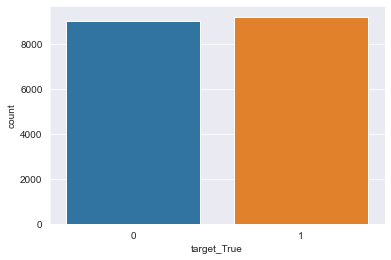

In [22]:
# fake vs true news number
import seaborn as sns
sns.set_style("darkgrid")
sns.countplot(df2['target_True']);

In [23]:
df2['target_True'].value_counts()

1    9210
0    9000
Name: target_True, dtype: int64

C:\Users\akshay m patil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


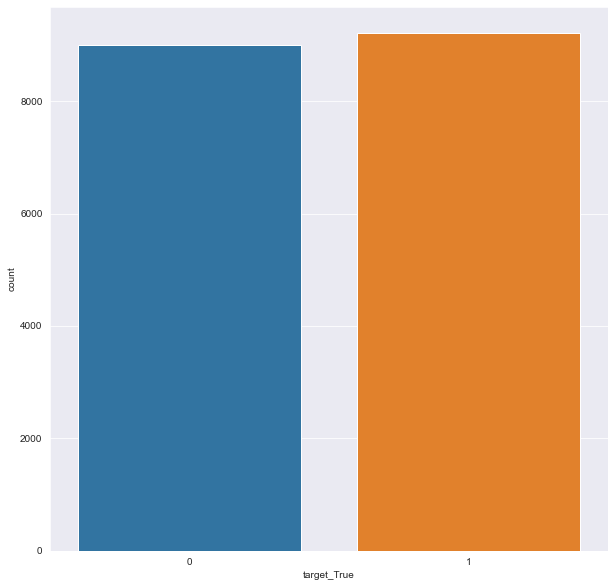

In [24]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,10))
sns.set_style("darkgrid")
sns.countplot(df2['target_True']);

In [25]:
!pip install wordcloud


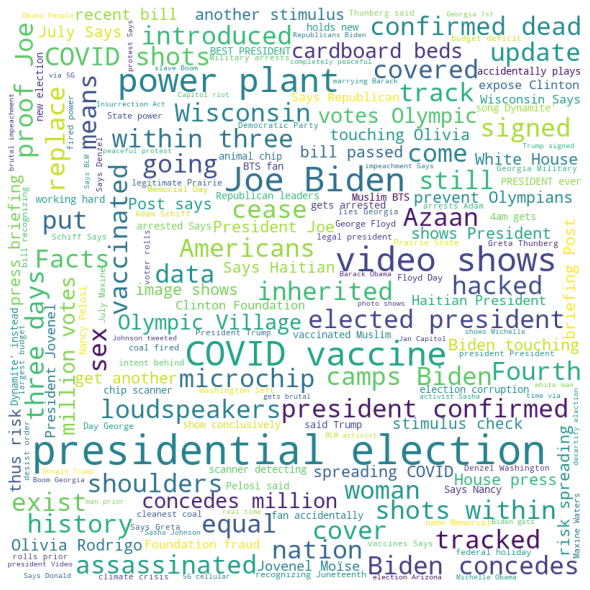

In [26]:
# wordcloud for fake news

from nltk.corpus import stopwords
from wordcloud import WordCloud

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords.words('english'), 
                min_font_size = 10).generate(" ".join(df2[df2['target_True'] == 0].fact)) 
  
# plot the word cloud for fake news data                      
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

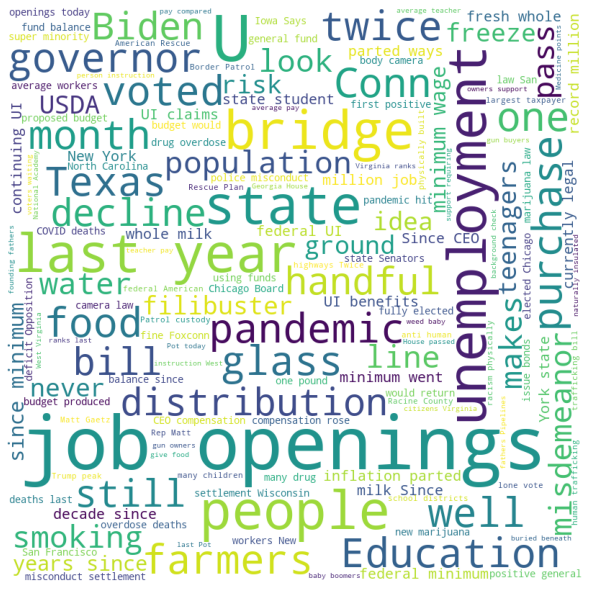

In [27]:
# wordcloud for true news

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords.words('english'), 
                min_font_size = 10).generate(" ".join(df2[df2['target_True'] == 1].fact)) 
  
# plot the word cloud for fake news data                      
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

In [28]:
# Removing the stop words

import nltk

# downloading the stopword list

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\akshay m
[nltk_data]     patil\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [29]:
# list of stopwords from english language only

from nltk.corpus import stopwords
stop_list = stopwords.words('english')
stop_list.extend(['says'])
stop_list



['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [30]:
# user defined function for removing stop_words

def remove_stop_words(x):
    
    x = [y for y in x.split() if y not in stop_list]
    
    # Combing the words with a space between them
    
    return " ".join(x)

# Appling user defined function
df2['final_text'] = df2['clean_text'].apply(remove_stop_words)

df2.head()


,author,fact,source,date,target_True,lower_text,clean_text,final_text
0,21,“It’s been over 50 years since minimum (wage) ...,19,June2021,1,“it's been over 50 years since minimum (wage) ...,it's been over years since minimum wage ...,years since minimum wage inflation parted ways...
1,18,“We have a record 9.3 million job openings in ...,9,June2021,1,“we have a record 9.3 million job openings in ...,we have a record million job openings in ...,record million job openings u
2,7,"“Before the pandemic, just over 40,000 were on...",20,June2021,1,"“before the pandemic, just over 40,000 were on...",before the pandemic just over were on...,pandemic continuing ui claims well state feder...
3,13,It’s not currently “legal for a New York state...,18,June2021,1,it's not currently “legal for a new york state...,it's not currently legal for a new york state...,currently legal new york state student glass f...
4,21,"“Since 1978, CEO compensation rose over 1,000%...",19,June2021,1,"“since 1978, ceo compensation rose over 1,000%...",since ceo compensation rose over ...,since ceo compensation rose average workers


In [31]:
print(df2['clean_text'][0])
print(df2['final_text'][0])

 it's been over    years since minimum  wage  and inflation parted ways  then over a decade since the federal minimum went up at all  
years since minimum wage inflation parted ways decade since federal minimum went


In [32]:
# creating df3 (checkpoint2)
# dropping all columns except reqiured colums 
df3 = df2.copy()
df3 = df3.drop(columns =['fact','date','lower_text','clean_text'] )
df3

,author,source,target_True,final_text
0,21,19,1,years since minimum wage inflation parted ways...
1,18,9,1,record million job openings u
2,7,20,1,pandemic continuing ui claims well state feder...
3,13,18,1,currently legal new york state student glass f...
4,21,19,1,since ceo compensation rose average workers
...,...,...,...,...
18205,28,2,0,video shows jan capitol riot completely peacef...
18206,6,12,0,photo shows michelle obama man prior marrying ...
18207,9,11,0,people covid vaccine tracked real time via g c...
18208,1,8,0,blm activist sasha johnson tweeted white man e...


In [33]:
# Lets create TF-IDF vectorizer

from sklearn.feature_extraction.text import TfidfVectorizer

vec = TfidfVectorizer()

In [34]:
# Lets create the DTM on text column

tdf_data = vec.fit_transform(df3['final_text'])

tdf_data

<18210x403 sparse matrix of type '<class 'numpy.float64'>'
	with 152155 stored elements in Compressed Sparse Row format>

In [35]:
# lets convert tdf_data to data frame to add author, source column
df_tf_idf = pd.DataFrame(tdf_data.toarray(),
                            columns = vec.get_feature_names())

df_tf_idf

,academy,accidentally,act,activist,adam,american,americans,among,animal,another,...,whole,wisconsin,within,woman,workers,working,would,year,years,york
0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.233079,0.000000
1,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000
2,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000
3,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.340365,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.340365
4,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.431888,0.0,0.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18205,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000
18206,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000
18207,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000
18208,0.0,0.0,0.0,0.343105,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000


In [36]:
# top 20 most frequently used words

word_freq = df_tf_idf.sum().reset_index()\
.rename(columns = {'index' : "Word",
                  0 : "Freq"})

word_freq.sort_values(by = 'Freq', ascending = False).head(20)

,Word,Freq
335,state,505.952684
275,president,498.336004
28,biden,461.948311
110,election,456.547951
394,wisconsin,450.755559
240,openings,410.795077
184,job,410.795077
145,georgia,405.693447
29,bill,339.877951
82,covid,332.274010


In [37]:
# copy pasting columns to data frame df_tf_idf1 from df3
df_tf_idf1 = df_tf_idf.copy()
df_tf_idf1['author'] = df3['author'].copy()
df_tf_idf1['source'] = df3['source'].copy()
df_tf_idf1['target_True'] = df3['target_True'].copy()

# let us not add columns to below df to use it to build model without author and source(to use only text column)
df_tf_idf['target_True'] = df3['target_True'].copy()

In [38]:
df_tf_idf1

,academy,accidentally,act,activist,adam,american,americans,among,animal,another,...,woman,workers,working,would,year,years,york,author,source,target_True
0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.233079,0.000000,21,19,1
1,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,18,9,1
2,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,7,20,1
3,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.340365,13,18,1
4,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.431888,0.0,0.0,0.0,0.000000,0.000000,21,19,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18205,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,28,2,0
18206,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,6,12,0
18207,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,9,11,0
18208,0.0,0.0,0.0,0.343105,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,1,8,0


In [39]:
df_tf_idf

,academy,accidentally,act,activist,adam,american,americans,among,animal,another,...,wisconsin,within,woman,workers,working,would,year,years,york,target_True
0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.233079,0.000000,1
1,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,1
2,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,1
3,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.340365,1
4,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.431888,0.0,0.0,0.0,0.000000,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18205,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0
18206,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0
18207,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0
18208,0.0,0.0,0.0,0.343105,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0


# splitting the data into test and train

In [40]:
from sklearn.model_selection import train_test_split
x = df_tf_idf1.drop(columns = ['target_True'])
y = df_tf_idf1[['target_True']]
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2, random_state=7)
len(x_train), len(x_test), len(y_train), len(y_test)

(14568, 3642, 14568, 3642)

In [41]:
y_train.value_counts()

target_True
1              7376
0              7192
dtype: int64

# buliding the model

In [42]:
from sklearn.metrics import classification_report

In [43]:
# Logistic Regression
lr = LogisticRegression()
model = lr.fit(x_train,y_train['target_True'])

# predict for train and test data
y_train['Predicted_target_LR'] = model.predict(x_train)
y_test['Predicted_target_LR'] = model.predict(x_test)

print(classification_report(y_train['target_True'],y_train['Predicted_target_LR']))# train accuracy
print(classification_report(y_test['target_True'],y_test['Predicted_target_LR'])) # test accuracy

C:\Users\akshay m patil\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7192
           1       1.00      1.00      1.00      7376

    accuracy                           1.00     14568
   macro avg       1.00      1.00      1.00     14568
weighted avg       1.00      1.00      1.00     14568

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1808
           1       1.00      1.00      1.00      1834

    accuracy                           1.00      3642
   macro avg       1.00      1.00      1.00      3642
weighted avg       1.00      1.00      1.00      3642



<ipython-input-43-919f1664a032>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_train['Predicted_target_LR'] = model.predict(x_train)
<ipython-input-43-919f1664a032>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_test['Predicted_target_LR'] = model.predict(x_test)


accuracy:   100.000


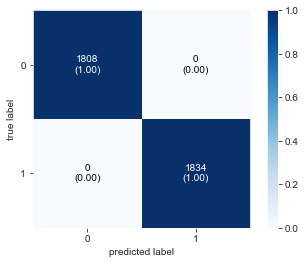

In [44]:
# Logistic Regression accuracy graph(test data)
score = metrics.accuracy_score(y_test['target_True'], y_test['Predicted_target_LR'])
print("accuracy:   %0.3f" % (score*100))
cm = metrics.confusion_matrix(y_test['target_True'], y_test['Predicted_target_LR'], labels=[0,1])



fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test['target_True'],y_test['Predicted_target_LR']),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

In [45]:
#decision tree
dt = DecisionTreeClassifier()
model_dt = dt.fit(x_train,y_train['target_True'])

# predict for train and test data
y_train['Predicted_target_DT'] = model_dt.predict(x_train)
y_test['Predicted_target_DT'] = model_dt.predict(x_test)

print(classification_report(y_train['target_True'],y_train['Predicted_target_DT']))# train accuracy
print(classification_report(y_test['target_True'],y_test['Predicted_target_DT'])) # test accuracy



              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7192
           1       1.00      1.00      1.00      7376

    accuracy                           1.00     14568
   macro avg       1.00      1.00      1.00     14568
weighted avg       1.00      1.00      1.00     14568

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1808
           1       1.00      1.00      1.00      1834

    accuracy                           1.00      3642
   macro avg       1.00      1.00      1.00      3642
weighted avg       1.00      1.00      1.00      3642



<ipython-input-45-e424778f4f8e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_train['Predicted_target_DT'] = model_dt.predict(x_train)
<ipython-input-45-e424778f4f8e>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_test['Predicted_target_DT'] = model_dt.predict(x_test)


accuracy:   100.000


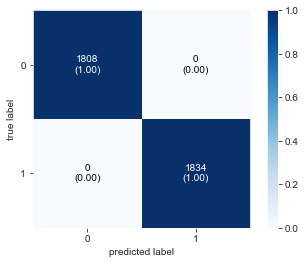

In [46]:
# DT Regression accuracy graph(test data)
score = metrics.accuracy_score(y_test['target_True'], y_test['Predicted_target_DT'])
print("accuracy:   %0.3f" % (score*100))
cm = metrics.confusion_matrix(y_test['target_True'], y_test['Predicted_target_DT'], labels=[0,1])



fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test['target_True'],y_test['Predicted_target_DT']),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

In [47]:
# Random Forest
rf = RandomForestClassifier()
model_rf = rf.fit(x_train,y_train['target_True'])

# predict for train and test data
y_train['Predicted_target_RF'] = model_rf.predict(x_train)
y_test['Predicted_target_RF'] = model_rf.predict(x_test)

print(classification_report(y_train['target_True'],y_train['Predicted_target_RF']))# train accuracy
print(classification_report(y_test['target_True'],y_test['Predicted_target_RF'])) # test accuracy



              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7192
           1       1.00      1.00      1.00      7376

    accuracy                           1.00     14568
   macro avg       1.00      1.00      1.00     14568
weighted avg       1.00      1.00      1.00     14568

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1808
           1       1.00      1.00      1.00      1834

    accuracy                           1.00      3642
   macro avg       1.00      1.00      1.00      3642
weighted avg       1.00      1.00      1.00      3642



<ipython-input-47-14f45d858308>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_train['Predicted_target_RF'] = model_rf.predict(x_train)
<ipython-input-47-14f45d858308>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_test['Predicted_target_RF'] = model_rf.predict(x_test)


accuracy:   100.000


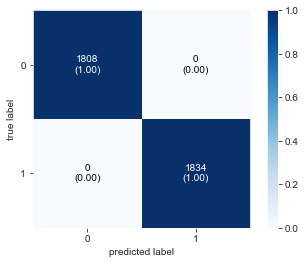

In [48]:
# Random Forest accuracy graph(test data)
score = metrics.accuracy_score(y_test['target_True'], y_test['Predicted_target_RF'])
print("accuracy:   %0.3f" % (score*100))
cm = metrics.confusion_matrix(y_test['target_True'], y_test['Predicted_target_RF'], labels=[0,1])



fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test['target_True'],y_test['Predicted_target_RF']),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

In [49]:
#KNN
knn = KNeighborsClassifier(n_neighbors=3)
model_knn = knn.fit(x_train,y_train['target_True'])

# predict for train and test data
y_train['Predicted_target_KNN'] = model_knn.predict(x_train)
y_test['Predicted_target_KNN'] = model_knn.predict(x_test)

print(classification_report(y_train['target_True'],y_train['Predicted_target_KNN']))# train accuracy
print(classification_report(y_test['target_True'],y_test['Predicted_target_KNN'])) # test accuracy


<ipython-input-49-45a396d68cd4>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_train['Predicted_target_KNN'] = model_knn.predict(x_train)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7192
           1       1.00      1.00      1.00      7376

    accuracy                           1.00     14568
   macro avg       1.00      1.00      1.00     14568
weighted avg       1.00      1.00      1.00     14568

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1808
           1       1.00      1.00      1.00      1834

    accuracy                           1.00      3642
   macro avg       1.00      1.00      1.00      3642
weighted avg       1.00      1.00      1.00      3642



<ipython-input-49-45a396d68cd4>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_test['Predicted_target_KNN'] = model_knn.predict(x_test)


accuracy:   100.000


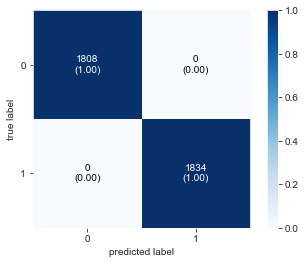

In [50]:
# KNN accuracy graph(test data)
score = metrics.accuracy_score(y_test['target_True'], y_test['Predicted_target_KNN'])
print("accuracy:   %0.3f" % (score*100))
cm = metrics.confusion_matrix(y_test['target_True'], y_test['Predicted_target_KNN'], labels=[0,1])



fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test['target_True'],y_test['Predicted_target_KNN']),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

In [51]:
#XGBoost
xgb = xgboost.XGBClassifier()
model_xgb = xgb.fit(x_train,y_train['target_True'])

# predict for train and test data
y_train['Predicted_target_XGB'] = model_xgb.predict(x_train)
y_test['Predicted_target_XGB'] = model_xgb.predict(x_test)

print(classification_report(y_train['target_True'],y_train['Predicted_target_XGB']))# train accuracy
print(classification_report(y_test['target_True'],y_test['Predicted_target_XGB'])) # test accuracy




C:\Users\akshay m patil\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:40:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7192
           1       1.00      1.00      1.00      7376

    accuracy                           1.00     14568
   macro avg       1.00      1.00      1.00     14568
weighted avg       1.00      1.00      1.00     14568

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1808
           1       1.00      1.00      1.00      1834

    accuracy                           1.00      3642
   macro avg       1.00      1.00      1.00      3642
weighted avg       1.00      1.00      1.00      3642



<ipython-input-51-63e5512afd78>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_train['Predicted_target_XGB'] = model_xgb.predict(x_train)
<ipython-input-51-63e5512afd78>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_test['Predicted_target_XGB'] = model_xgb.predict(x_test)


accuracy:   100.000


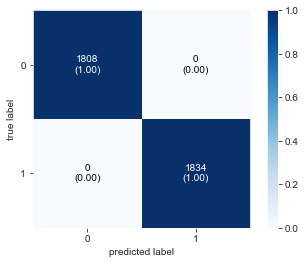

In [52]:
# XGBoost accuracy graph(test data)
score = metrics.accuracy_score(y_test['target_True'], y_test['Predicted_target_XGB'])
print("accuracy:   %0.3f" % (score*100))
cm = metrics.confusion_matrix(y_test['target_True'], y_test['Predicted_target_XGB'], labels=[0,1])



fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test['target_True'],y_test['Predicted_target_XGB']),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

In [53]:
# SVM
svm = LinearSVC()
model_svm = svm.fit(x_train,y_train['target_True'])

# predict for train and test data
y_train['Predicted_target_SVM'] = model_svm.predict(x_train)
y_test['Predicted_target_SVM'] = model_svm.predict(x_test)

print(classification_report(y_train['target_True'],y_train['Predicted_target_SVM']))# train accuracy
print(classification_report(y_test['target_True'],y_test['Predicted_target_SVM'])) # test accuracy

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7192
           1       1.00      1.00      1.00      7376

    accuracy                           1.00     14568
   macro avg       1.00      1.00      1.00     14568
weighted avg       1.00      1.00      1.00     14568

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1808
           1       1.00      1.00      1.00      1834

    accuracy                           1.00      3642
   macro avg       1.00      1.00      1.00      3642
weighted avg       1.00      1.00      1.00      3642



C:\Users\akshay m patil\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
<ipython-input-53-04cdd5c06bbd>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_train['Predicted_target_SVM'] = model_svm.predict(x_train)
<ipython-input-53-04cdd5c06bbd>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_test['Predicted_target_SVM'] = model_svm.predict(x_test)


accuracy:   100.000


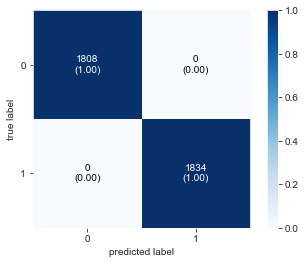

In [54]:
# svm accuracy graph(test data)
score = metrics.accuracy_score(y_test['target_True'], y_test['Predicted_target_SVM'])
print("accuracy:   %0.3f" % (score*100))
cm = metrics.confusion_matrix(y_test['target_True'], y_test['Predicted_target_SVM'], labels=[0,1])



fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test['target_True'],y_test['Predicted_target_SVM']),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

In [55]:
y_train

,target_True,Predicted_target_LR,Predicted_target_DT,Predicted_target_RF,Predicted_target_KNN,Predicted_target_XGB,Predicted_target_SVM
13567,0,0,0,0,0,0,0
10983,0,0,0,0,0,0,0
4031,1,1,1,1,1,1,1
6516,1,1,1,1,1,1,1
7528,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...
13927,0,0,0,0,0,0,0
919,1,1,1,1,1,1,1
5699,1,1,1,1,1,1,1
10742,0,0,0,0,0,0,0


In [172]:
y_test

,target_True,Predicted_target_LR,Predicted_target_DT,Predicted_target_RF,Predicted_target_KNN,Predicted_target_XGB,Predicted_target_SVM,Predicted_target_Stack
14501,0,0,0,0,0,0,0,0
16662,0,0,0,0,0,0,0,0
9391,0,0,0,0,0,0,0,0
11444,0,0,0,0,0,0,0,0
7350,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...
6671,1,1,1,1,1,1,1,1
835,1,1,1,1,1,1,1,1
10125,0,0,0,0,0,0,0,0
10153,0,0,0,0,0,0,0,0


# building model without author and source
# # dividing into test and train

In [57]:
from sklearn.model_selection import train_test_split
x = df_tf_idf.drop(columns = ['target_True'])
y = df_tf_idf[['target_True']]
x_train1,x_test1,y_train1,y_test1=train_test_split(x,y, test_size=0.2, random_state=7)
len(x_train1), len(x_test1), len(y_train1), len(y_test1)

(14568, 3642, 14568, 3642)

In [58]:
# Logistic Regression
lr1 = LogisticRegression()
model1 = lr1.fit(x_train1,y_train1['target_True'])

# predict for train and test data
y_train1['Predicted_target_LR'] = model1.predict(x_train1)
y_test1['Predicted_target_LR'] = model1.predict(x_test1)

print(classification_report(y_train1['target_True'],y_train1['Predicted_target_LR']))# train accuracy
print(classification_report(y_test1['target_True'],y_test1['Predicted_target_LR'])) # test accuracy

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7192
           1       1.00      1.00      1.00      7376

    accuracy                           1.00     14568
   macro avg       1.00      1.00      1.00     14568
weighted avg       1.00      1.00      1.00     14568

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1808
           1       1.00      1.00      1.00      1834

    accuracy                           1.00      3642
   macro avg       1.00      1.00      1.00      3642
weighted avg       1.00      1.00      1.00      3642



<ipython-input-58-ba64ea079d8b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_train1['Predicted_target_LR'] = model1.predict(x_train1)
<ipython-input-58-ba64ea079d8b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_test1['Predicted_target_LR'] = model1.predict(x_test1)


accuracy:   100.000


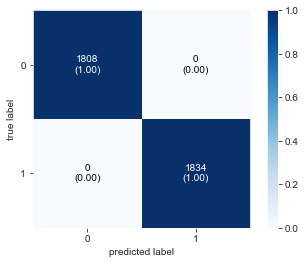

In [59]:
# Logistic Regression accuracy graph(test data)
score = metrics.accuracy_score(y_test1['target_True'], y_test1['Predicted_target_LR'])
print("accuracy:   %0.3f" % (score*100))
cm = metrics.confusion_matrix(y_test1['target_True'], y_test1['Predicted_target_LR'], labels=[0,1])



fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test1['target_True'],y_test1['Predicted_target_LR']),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

In [60]:
#decision tree
dt1 = DecisionTreeClassifier()
model_dt1 = dt1.fit(x_train1,y_train1['target_True'])

# predict for train and test data
y_train1['Predicted_target_DT'] = model_dt1.predict(x_train1)
y_test1['Predicted_target_DT'] = model_dt1.predict(x_test1)

print(classification_report(y_train1['target_True'],y_train1['Predicted_target_DT']))# train accuracy
print(classification_report(y_test1['target_True'],y_test1['Predicted_target_DT'])) # test accuracy



              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7192
           1       1.00      1.00      1.00      7376

    accuracy                           1.00     14568
   macro avg       1.00      1.00      1.00     14568
weighted avg       1.00      1.00      1.00     14568

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1808
           1       1.00      1.00      1.00      1834

    accuracy                           1.00      3642
   macro avg       1.00      1.00      1.00      3642
weighted avg       1.00      1.00      1.00      3642



<ipython-input-60-01fd7a133d17>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_train1['Predicted_target_DT'] = model_dt1.predict(x_train1)
<ipython-input-60-01fd7a133d17>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_test1['Predicted_target_DT'] = model_dt1.predict(x_test1)


accuracy:   100.000


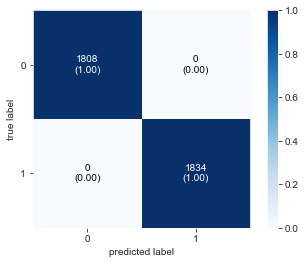

In [61]:
# DT Regression accuracy graph(test data)
score = metrics.accuracy_score(y_test1['target_True'], y_test1['Predicted_target_DT'])
print("accuracy:   %0.3f" % (score*100))
cm = metrics.confusion_matrix(y_test1['target_True'], y_test1['Predicted_target_DT'], labels=[0,1])



fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test1['target_True'],y_test1['Predicted_target_DT']),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

In [62]:
# Random Forest
rf1 = RandomForestClassifier()
model_rf1 = rf1.fit(x_train1,y_train1['target_True'])

# predict for train and test data
y_train1['Predicted_target_RF'] = model_rf1.predict(x_train1)
y_test1['Predicted_target_RF'] = model_rf1.predict(x_test1)

print(classification_report(y_train1['target_True'],y_train1['Predicted_target_RF']))# train accuracy
print(classification_report(y_test1['target_True'],y_test1['Predicted_target_RF'])) # test accuracy



<ipython-input-62-5c54bd24ab2f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_train1['Predicted_target_RF'] = model_rf1.predict(x_train1)
<ipython-input-62-5c54bd24ab2f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_test1['Predicted_target_RF'] = model_rf1.predict(x_test1)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7192
           1       1.00      1.00      1.00      7376

    accuracy                           1.00     14568
   macro avg       1.00      1.00      1.00     14568
weighted avg       1.00      1.00      1.00     14568

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1808
           1       1.00      1.00      1.00      1834

    accuracy                           1.00      3642
   macro avg       1.00      1.00      1.00      3642
weighted avg       1.00      1.00      1.00      3642



accuracy:   100.000


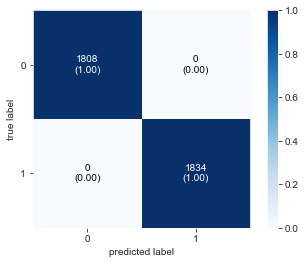

In [63]:
# Random Forest accuracy graph(test data)
score = metrics.accuracy_score(y_test1['target_True'], y_test1['Predicted_target_RF'])
print("accuracy:   %0.3f" % (score*100))
cm = metrics.confusion_matrix(y_test1['target_True'], y_test1['Predicted_target_RF'], labels=[0,1])



fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test1['target_True'],y_test1['Predicted_target_RF']),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

In [64]:
#KNN
knn1 = KNeighborsClassifier(n_neighbors=3)
model_knn1 = knn1.fit(x_train1,y_train1['target_True'])

# predict for train and test data
y_train1['Predicted_target_KNN'] = model_knn1.predict(x_train1)
y_test1['Predicted_target_KNN'] = model_knn1.predict(x_test1)

print(classification_report(y_train1['target_True'],y_train1['Predicted_target_KNN']))# train accuracy
print(classification_report(y_test1['target_True'],y_test1['Predicted_target_KNN'])) # test accuracy


<ipython-input-64-6c1772ba9db4>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_train1['Predicted_target_KNN'] = model_knn1.predict(x_train1)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7192
           1       1.00      1.00      1.00      7376

    accuracy                           1.00     14568
   macro avg       1.00      1.00      1.00     14568
weighted avg       1.00      1.00      1.00     14568

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1808
           1       1.00      1.00      1.00      1834

    accuracy                           1.00      3642
   macro avg       1.00      1.00      1.00      3642
weighted avg       1.00      1.00      1.00      3642



<ipython-input-64-6c1772ba9db4>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_test1['Predicted_target_KNN'] = model_knn1.predict(x_test1)


accuracy:   100.000


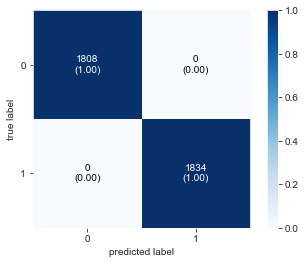

In [65]:
# KNN accuracy graph(test data)
score = metrics.accuracy_score(y_test1['target_True'], y_test1['Predicted_target_KNN'])
print("accuracy:   %0.3f" % (score*100))
cm = metrics.confusion_matrix(y_test1['target_True'], y_test1['Predicted_target_KNN'], labels=[0,1])



fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test1['target_True'],y_test1['Predicted_target_KNN']),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

In [66]:
#XGBoost
xgb1 = xgboost.XGBClassifier()
model_xgb1 = xgb1.fit(x_train1,y_train1['target_True'])

# predict for train and test data
y_train1['Predicted_target_XGB'] = model_xgb1.predict(x_train1)
y_test1['Predicted_target_XGB'] = model_xgb1.predict(x_test1)

print(classification_report(y_train1['target_True'],y_train1['Predicted_target_XGB']))# train accuracy
print(classification_report(y_test1['target_True'],y_test1['Predicted_target_XGB'])) # test accuracy


C:\Users\akshay m patil\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:41:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7192
           1       1.00      1.00      1.00      7376

    accuracy                           1.00     14568
   macro avg       1.00      1.00      1.00     14568
weighted avg       1.00      1.00      1.00     14568

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1808
           1       1.00      1.00      1.00      1834

    accuracy                           1.00      3642
   macro avg       1.00      1.00      1.00      3642
weighted avg       1.00      1.00      1.00      3642



<ipython-input-66-7887de8bc6af>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_train1['Predicted_target_XGB'] = model_xgb1.predict(x_train1)
<ipython-input-66-7887de8bc6af>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_test1['Predicted_target_XGB'] = model_xgb1.predict(x_test1)


accuracy:   100.000


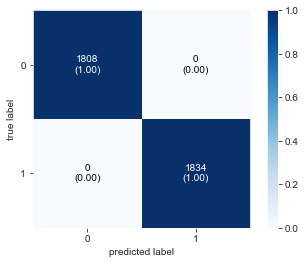

In [67]:
# XGBoost accuracy graph(test data)
score = metrics.accuracy_score(y_test1['target_True'], y_test1['Predicted_target_XGB'])
print("accuracy:   %0.3f" % (score*100))
cm = metrics.confusion_matrix(y_test1['target_True'], y_test1['Predicted_target_XGB'], labels=[0,1])



fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test1['target_True'],y_test1['Predicted_target_XGB']),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

In [68]:
# SVM
svm1 = LinearSVC()
model_svm1 = svm1.fit(x_train1,y_train1['target_True'])

# predict for train and test data
y_train1['Predicted_target_SVM'] = model_svm1.predict(x_train1)
y_test1['Predicted_target_SVM'] = model_svm1.predict(x_test1)

print(classification_report(y_train1['target_True'],y_train1['Predicted_target_SVM']))# train accuracy
print(classification_report(y_test1['target_True'],y_test1['Predicted_target_SVM'])) # test accuracy

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7192
           1       1.00      1.00      1.00      7376

    accuracy                           1.00     14568
   macro avg       1.00      1.00      1.00     14568
weighted avg       1.00      1.00      1.00     14568

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1808
           1       1.00      1.00      1.00      1834

    accuracy                           1.00      3642
   macro avg       1.00      1.00      1.00      3642
weighted avg       1.00      1.00      1.00      3642



<ipython-input-68-4068155a2580>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_train1['Predicted_target_SVM'] = model_svm1.predict(x_train1)
<ipython-input-68-4068155a2580>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_test1['Predicted_target_SVM'] = model_svm1.predict(x_test1)


accuracy:   100.000


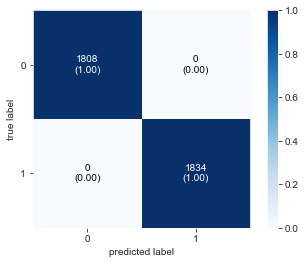

In [69]:
# svm accuracy graph(test data)
score = metrics.accuracy_score(y_test1['target_True'], y_test1['Predicted_target_SVM'])
print("accuracy:   %0.3f" % (score*100))
cm = metrics.confusion_matrix(y_test1['target_True'], y_test1['Predicted_target_SVM'], labels=[0,1])



fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test1['target_True'],y_test1['Predicted_target_SVM']),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

In [70]:
y_train1

,target_True,Predicted_target_LR,Predicted_target_DT,Predicted_target_RF,Predicted_target_KNN,Predicted_target_XGB,Predicted_target_SVM
13567,0,0,0,0,0,0,0
10983,0,0,0,0,0,0,0
4031,1,1,1,1,1,1,1
6516,1,1,1,1,1,1,1
7528,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...
13927,0,0,0,0,0,0,0
919,1,1,1,1,1,1,1
5699,1,1,1,1,1,1,1
10742,0,0,0,0,0,0,0


In [71]:
y_test1

,target_True,Predicted_target_LR,Predicted_target_DT,Predicted_target_RF,Predicted_target_KNN,Predicted_target_XGB,Predicted_target_SVM
14501,0,0,0,0,0,0,0
16662,0,0,0,0,0,0,0
9391,0,0,0,0,0,0,0
11444,0,0,0,0,0,0,0
7350,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...
6671,1,1,1,1,1,1,1
835,1,1,1,1,1,1,1
10125,0,0,0,0,0,0,0
10153,0,0,0,0,0,0,0


In [72]:
# author name source name  with number df
df_author_number = pd.DataFrame()
df_author_number['author_name'] = df['author'].copy()
df_author_number['author'] =  df1['author'].copy()
df_author_number.sort_values("author_name", inplace = True)
df_author_number = df_author_number.drop_duplicates()
df_author_number

,author_name,author
13039,AmySherman,0
16678,AndyNguyen,1
11921,BillMcCarthy,2
6265,BrandonMulder,3
3764,BrianGrace,4
7751,ChrisNichols,5
14498,CiaraO'Rourke,6
7892,D.L.Davis,7
1189,DuncanSlade,8
17397,GabrielleSettles,9


In [73]:
df_source_number = pd.DataFrame()
df_source_number['source_name'] = df['source'].copy()
df_source_number['source'] = df1['source'].copy()
df_source_number.sort_values("source_name", inplace = True)
df_source_number = df_source_number.drop_duplicates()
df_source_number

,source_name,source
1071,Barbara Dittrich,0
4162,Beth Wessel-Kroeschell,1
16400,Bloggers,2
2126,Chris Kapenga,3
3564,Chuck Todd,4
5969,Cory Booker,5
11083,Donald Trump,6
4555,Energy Transfer,7
14154,Facebook posts,8
2281,Glenn Grothman,9


In [74]:
df_author_number

,author_name,author
13039,AmySherman,0
16678,AndyNguyen,1
11921,BillMcCarthy,2
6265,BrandonMulder,3
3764,BrianGrace,4
7751,ChrisNichols,5
14498,CiaraO'Rourke,6
7892,D.L.Davis,7
1189,DuncanSlade,8
17397,GabrielleSettles,9


## testing the models (AUTHOR - Tom Kertscher, SOURCE - 'Instagram posts', NEWS - '“Joe Biden is on a two-week vacation. Kamala Harris has been nonexistent since Inauguration Day. Jen Psaki is taking a break from her duties as press secretary for one week.”

In [76]:
#“Joe Biden is on a two-week vacation. Kamala Harris has been nonexistent since Inauguration Day. Jen Psaki is taking a break from her duties as press secretary for one week.”
# by Tom Kertscher
# source Instagram posts

In [136]:
df_author_number.loc[df_author_number['author_name'] == 'TomKertscher']# paste the author 

,author_name,author
17731,TomKertscher,28


In [137]:
df_source_number.loc[df_source_number['source_name'] == 'Instagram posts']# paste the source

,source_name,source
16851,Instagram posts,12


In [138]:
test_data = pd.DataFrame({"author":28,"source" : 12 ,"fact" : ["“Joe Biden is on a two-week vacation. Kamala Harris has been nonexistent since Inauguration Day. Jen Psaki is taking a break from her duties as press secretary for one week.”"]})

test_data

,author,source,fact
0,28,12,“Joe Biden is on a two-week vacation. Kamala H...


In [139]:
test_data['lower_text'] = test_data['fact'].str.lower()
test_data['lower_text'] = test_data['lower_text'].str.replace('’','\'')   
test_data['clean_text'] = test_data['lower_text'].str.replace("[^a-z' ]", " ")

## removing stop words
test_data['final_text'] = test_data['clean_text'].apply(remove_stop_words)

test_data

,author,source,fact,lower_text,clean_text,final_text
0,28,12,“Joe Biden is on a two-week vacation. Kamala H...,“joe biden is on a two-week vacation. kamala h...,joe biden is on a two week vacation kamala h...,joe biden two week vacation kamala harris none...


In [140]:
test_data = test_data.drop(columns =['fact','lower_text','clean_text'] )

In [141]:
# tdf_idf 
tdf_data_test = vec.transform(test_data['final_text'])

In [142]:
df_tf_idf_test = pd.DataFrame(tdf_data_test.toarray(),
                            columns = vec.get_feature_names())

df_tf_idf_test

,academy,accidentally,act,activist,adam,american,americans,among,animal,another,...,whole,wisconsin,within,woman,workers,working,would,year,years,york
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [143]:
word_freq = df_tf_idf_test.sum().reset_index()\
.rename(columns = {'index' : "Word",
                  0 : "Freq"})

word_freq.sort_values(by = 'Freq', ascending = False).head(20)

,Word,Freq
277,press,0.468068
87,day,0.468068
185,joe,0.404638
239,one,0.402526
329,since,0.365382
28,biden,0.320252
276,presidential,0.000000
275,president,0.000000
274,prairie,0.000000
273,power,0.000000


In [144]:
# adding author and source
df_tf_idf_test1 = df_tf_idf_test.copy()
df_tf_idf_test1['author'] = test_data['author'].copy()
df_tf_idf_test1['source'] = test_data['source'].copy()
#df_tf_idf_test1['target_True'] = df3['target_True'].copy()

# let us not add columns to below df to use it to build model without author and source(to use only text column)
#df_tf_idf_test['target_True'] = df3['target_True'].copy()

In [145]:
df_tf_idf_test1

,academy,accidentally,act,activist,adam,american,americans,among,animal,another,...,within,woman,workers,working,would,year,years,york,author,source
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28,12


## prediciting (with author and source)

In [146]:
model.predict(df_tf_idf_test1)

array([0], dtype=uint8)

In [147]:
model_dt.predict(df_tf_idf_test1)

array([0], dtype=uint8)

In [148]:
model_rf.predict(df_tf_idf_test1)

array([0], dtype=uint8)

In [149]:
model_knn.predict(df_tf_idf_test1)

array([0], dtype=uint8)

In [150]:
model_xgb.predict(df_tf_idf_test1)

array([0], dtype=uint8)

In [151]:
model_svm.predict(df_tf_idf_test1)

array([0], dtype=uint8)

# Stacked models - prediction = 0 (fake)

In [152]:
stack_model.predict(df_tf_idf_test1)

array([0], dtype=uint8)

In [153]:
model1.predict(df_tf_idf_test)

array([0], dtype=uint8)

In [154]:
model_dt1.predict(df_tf_idf_test)

array([0], dtype=uint8)

In [155]:
model_rf1.predict(df_tf_idf_test)

array([1], dtype=uint8)

In [156]:
model_knn1.predict(df_tf_idf_test)

array([0], dtype=uint8)

In [157]:
model_xgb1.predict(df_tf_idf_test)

array([0], dtype=uint8)

In [158]:
model_svm1.predict(df_tf_idf_test)

array([0], dtype=uint8)

# For testing - 2 (author - Madeline Heim, source - Twitter, news - '“324,000 pregnant people experience domestic violence during their pregnancy.”)

In [159]:
df_author_number.loc[df_author_number['author_name'] == 'MadelineHeim']# paste the author 

,author_name,author
0,MadelineHeim,21


In [161]:
df_source_number.loc[df_source_number['source_name'] == 'Tweets']# paste the source

,source_name,source
11494,Tweets,31


In [162]:
test_data = pd.DataFrame({"author":21,"source" : 31 ,"fact" : ["“324,000 pregnant people experience domestic violence during their pregnancy.”"]})

test_data

,author,source,fact
0,21,31,"“324,000 pregnant people experience domestic v..."


In [163]:
test_data['lower_text'] = test_data['fact'].str.lower()
test_data['lower_text'] = test_data['lower_text'].str.replace('’','\'')   
test_data['clean_text'] = test_data['lower_text'].str.replace("[^a-z' ]", " ")

## removing stop words
test_data['final_text'] = test_data['clean_text'].apply(remove_stop_words)

test_data

,author,source,fact,lower_text,clean_text,final_text
0,21,31,"“324,000 pregnant people experience domestic v...","“324,000 pregnant people experience domestic v...",pregnant people experience domestic v...,pregnant people experience domestic violence p...


In [164]:
test_data = test_data.drop(columns =['fact','lower_text','clean_text'] )

In [165]:
# tdf_idf 
tdf_data_test = vec.transform(test_data['final_text'])

In [166]:
df_tf_idf_test = pd.DataFrame(tdf_data_test.toarray(),
                            columns = vec.get_feature_names())

df_tf_idf_test

,academy,accidentally,act,activist,adam,american,americans,among,animal,another,...,whole,wisconsin,within,woman,workers,working,would,year,years,york
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [167]:
word_freq = df_tf_idf_test.sum().reset_index()\
.rename(columns = {'index' : "Word",
                  0 : "Freq"})

word_freq.sort_values(by = 'Freq', ascending = False).head(20)

,Word,Freq
257,people,1.0
0,academy,0.0
265,points,0.0
275,president,0.0
274,prairie,0.0
273,power,0.0
272,pound,0.0
271,pot,0.0
270,post,0.0
269,positive,0.0


In [168]:
# adding author and source
df_tf_idf_test1 = df_tf_idf_test.copy()
df_tf_idf_test1['author'] = test_data['author'].copy()
df_tf_idf_test1['source'] = test_data['source'].copy()
#df_tf_idf_test1['target_True'] = df3['target_True'].copy()

# let us not add columns to below df to use it to build model without author and source(to use only text column)
#df_tf_idf_test['target_True'] = df3['target_True'].copy()

In [169]:
df_tf_idf_test1

,academy,accidentally,act,activist,adam,american,americans,among,animal,another,...,within,woman,workers,working,would,year,years,york,author,source
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21,31


# Stacked Model - Prediction = 1 (true news)

In [170]:
stack_model.predict(df_tf_idf_test1)

array([1], dtype=uint8)

In [133]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

estimator_list = [
    ('knn',knn),
    ('svm',svm),
    ('dt',dt),
    ('rf',rf),
    ('xgb',xgb),
    ('lr',lr)]

# Build stack model
stack_model = StackingClassifier(
    estimators=estimator_list, final_estimator=LogisticRegression()
)

# Train stacked model
stack_model.fit(x_train, y_train['target_True'])


# predict for train and test data
y_train['Predicted_target_Stack'] = stack_model.predict(x_train)
y_test['Predicted_target_Stack'] = stack_model.predict(x_test)

print(classification_report(y_train['target_True'],y_train['Predicted_target_Stack']))# train accuracy
print(classification_report(y_test['target_True'],y_test['Predicted_target_Stack'])) # test accuracy




C:\Users\akshay m patil\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\akshay m patil\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:17:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\akshay m patil\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\akshay m patil\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\akshay m patil\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\akshay m patil\anaconda3\l

[13:18:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\akshay m patil\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:18:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\akshay m patil\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:18:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\akshay m patil\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:18:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\akshay m patil\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:18:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\akshay m patil\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\akshay m patil\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7192
           1       1.00      1.00      1.00      7376

    accuracy                           1.00     14568
   macro avg       1.00      1.00      1.00     14568
weighted avg       1.00      1.00      1.00     14568

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1808
           1       1.00      1.00      1.00      1834

    accuracy                           1.00      3642
   macro avg       1.00      1.00      1.00      3642
weighted avg       1.00      1.00      1.00      3642



accuracy:   100.000


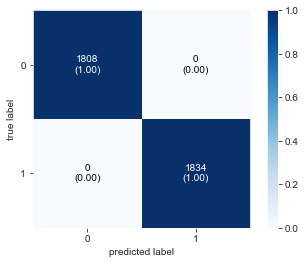

In [171]:
# svm accuracy graph(test data)
score = metrics.accuracy_score(y_test['target_True'], y_test['Predicted_target_Stack'])
print("accuracy:   %0.3f" % (score*100))
cm = metrics.confusion_matrix(y_test['target_True'], y_test['Predicted_target_Stack'], labels=[0,1])



fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test['target_True'],y_test['Predicted_target_Stack']),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

In [99]:
df3

,author,source,target_True,final_text
0,21,19,1,years since minimum wage inflation parted ways...
1,18,9,1,record million job openings u
2,7,20,1,pandemic continuing ui claims well state feder...
3,13,18,1,currently legal new york state student glass f...
4,21,19,1,since ceo compensation rose average workers
...,...,...,...,...
18205,28,2,0,video shows jan capitol riot completely peacef...
18206,6,12,0,photo shows michelle obama man prior marrying ...
18207,9,11,0,people covid vaccine tracked real time via g c...
18208,1,8,0,blm activist sasha johnson tweeted white man e...


In [100]:
df1

,author,fact,source,date,target_True,lower_text,clean_text
0,21,“It’s been over 50 years since minimum (wage) ...,19,June2021,1,“it’s been over 50 years since minimum (wage) ...,it’s been over years since minimum wage ...
1,18,“We have a record 9.3 million job openings in ...,9,June2021,1,“we have a record 9.3 million job openings in ...,we have a record million job openings in ...
2,7,"“Before the pandemic, just over 40,000 were on...",20,June2021,1,"“before the pandemic, just over 40,000 were on...",before the pandemic just over were on...
3,13,It’s not currently “legal for a New York state...,18,June2021,1,it’s not currently “legal for a new york state...,it’s not currently legal for a new york state...
4,21,"“Since 1978, CEO compensation rose over 1,000%...",19,June2021,1,"“since 1978, ceo compensation rose over 1,000%...",since ceo compensation rose over ...
...,...,...,...,...,...,...,...
18205,28,Video shows the Jan. 6 Capitol riot was a “com...,2,June2021,0,video shows the jan. 6 capitol riot was a “com...,video shows the jan capitol riot was a com...
18206,6,Says a photo shows Michelle Obama as a man pri...,12,June2021,0,says a photo shows michelle obama as a man pri...,says a photo shows michelle obama as a man pri...
18207,9,"People with the COVID-19 vaccine are being ""tr...",11,May2021,0,"people with the covid-19 vaccine are being ""tr...",people with the covid vaccine are being tr...
18208,1,"Says BLM activist Sasha Johnson tweeted, “The ...",8,May2021,0,"says blm activist sasha johnson tweeted, “the ...",says blm activist sasha johnson tweeted the ...


In [101]:
#def author_source_number(author_n,source_n):
 #   if df_author_number['author_name'] == 'author':
  #    print('the author number is :'+df_author_number.loc[df_author_number['author_name'] == 'yellow'])
   # else:
    #    print(0)
    #if df_source_number['source_name'] == 'source':
     #   print('the source number is :'+df_source_number.loc[df_source_number['source_name'] == 'source'])
    #else:
     #   print(0)    
        



In [102]:

#author_source_number('MadelineHeim','Mandela Barnes')

In [103]:
df_author_number.loc[df_author_number['author_name'] == 'MadelineHeim']


,author_name,author
0,MadelineHeim,21


In [104]:
df_source_number.loc[df_source_number['source_name'] == 'Mandela Barnes']

,source_name,source
0,Mandela Barnes,19
